# MultiVariate Analysis Example with python

### importing python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
print("Pandas ", pd.__version__)
print("Numpy ", np.__version__)
print("Seaborn  ", sns.__version__)

Pandas  1.2.1
Numpy  1.19.2
Seaborn   0.11.1


In [ ]:
### importing the modules from  Scikit learn

In [11]:
from sklearn.preprocessing import scale
from sklearn.decomposition import pca
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# plots inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

# number of max rows to print for a Dataframe
DISPLAY_MAX_ROWS = 20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)


In [10]:
# qtconsole

### Datset Explanation 
Wine Data contains data on concentration of 13 different constituents found in each three different type of wines, grown in the same region in Italy.

Dataset characteristics : Multivariate

Attribute characteristics: Integer, Real

Number of attributes :     13

Attributes are:
    1. Alcohol 

    2. Malic acid

    3. Ash

    4. Alcalinity of Ash

    5. Magnesium

    6. Total Phenols

    7. Flavanoids

    8. Nonflavanoid Phenols

    9. Proanthocyanins

    10. Color Intensity

    11. Hue

    12. OD280/OD315 of dilluted wines
    
    13. Proline
    
Number of data points: 178

Source : UCI Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/Wine

In [12]:
# reading the data from file as a dataframe
data = pd.read_csv("wine.data")


In [13]:
# renaming the columns of the dataset for better accessibility
data.columns = ["attr"+str(i) for i in range(1, len(data.columns)+1)]
# # converting the wine to string
# data.attr1 = data.attr1.astype(str)

# independent variable data
X = data.loc[:,"attr2":]
#  dependent variable data
Y = data.attr1

In [14]:
data

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
X

,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
X.describe()

,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attr2   177 non-null    float64
 1   attr3   177 non-null    float64
 2   attr4   177 non-null    float64
 3   attr5   177 non-null    float64
 4   attr6   177 non-null    int64  
 5   attr7   177 non-null    float64
 6   attr8   177 non-null    float64
 7   attr9   177 non-null    float64
 8   attr10  177 non-null    float64
 9   attr11  177 non-null    float64
 10  attr12  177 non-null    float64
 11  attr13  177 non-null    float64
 12  attr14  177 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.1 KB


In [18]:
# correlation between the independent variable
correlation = X.corr()
print(correlation)

           attr2     attr3     attr4     attr5     attr6     attr7     attr8  \
attr2   1.000000  0.099963  0.210964 -0.303350  0.258742  0.284543  0.230133   
attr3   0.099963  1.000000  0.164955  0.286148 -0.049049 -0.333512 -0.409324   
attr4   0.210964  0.164955  1.000000  0.446698  0.287107  0.128176  0.114084   
attr5  -0.303350  0.286148  0.446698  1.000000 -0.071707 -0.317583 -0.346922   
attr6   0.258742 -0.049049  0.287107 -0.071707  1.000000  0.208200  0.187101   
attr7   0.284543 -0.333512  0.128176 -0.317583  0.208200  1.000000  0.864046   
attr8   0.230133 -0.409324  0.114084 -0.346922  0.187101  0.864046  1.000000   
attr9  -0.151445  0.291501  0.187354  0.359395 -0.252091 -0.448301 -0.536326   
attr10  0.127561 -0.217975  0.008082 -0.190779  0.226504  0.610533  0.650254   
attr11  0.547883  0.250053  0.258643  0.020478  0.199337 -0.056401 -0.174411   
attr12 -0.075375 -0.560854 -0.075181 -0.272719  0.052042  0.432987  0.543208   
attr13  0.057417 -0.366720  0.001503 -0.

### Frequency distributions of the attributes

Text(0, 0.5, 'Density')

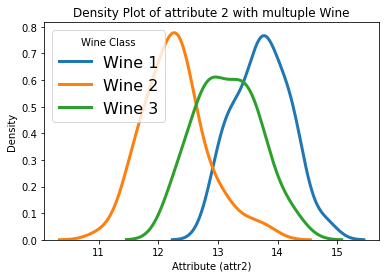

In [19]:
# density plot for the attributes : univariate distribution of attributes
for i in range(1,4):
    # subsetting the dataset as per class of the wine
   
    subset = data[data["attr1"]==i]
    
    # drawing the density plot
    sns.distplot(subset['attr2'], hist=False, kde=True,
    kde_kws={'linewidth':3}, label = "Wine "+str(i))

plt.legend(prop={'size':16}, title = "Wine Class")
plt.title('Density Plot of attribute 2 with multuple Wine')
plt.xlabel("Attribute (attr2)")
plt.ylabel("Density")

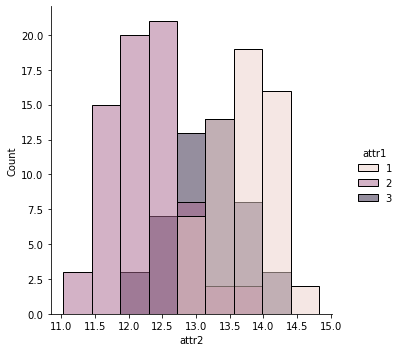

In [20]:
sns.displot(data, x="attr2", hue="attr1")

In [9]:
sns.__version__

'0.11.1'

In [21]:
X.apply(np.mean)

attr2      12.993672
attr3       2.339887
attr4       2.366158
attr5      19.516949
attr6      99.587571
attr7       2.292260
attr8       2.023446
attr9       0.362316
attr10      1.586949
attr11      5.054802
attr12      0.956983
attr13      2.604294
attr14    745.096045
dtype: float64

In [22]:
X.apply(np.std)

attr2       0.806520
attr3       1.116148
attr4       0.274302
attr5       3.326634
attr6      14.133922
attr7       0.624693
attr8       0.995833
attr9       0.124300
attr10      0.569928
attr11      2.317871
attr12      0.228487
attr13      0.703108
attr14    313.993283
dtype: float64

In [23]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [24]:
printMeanAndSdByGroup(X, Y)

## Means:


,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14
attr1,,,,,,,,,,,,,
1,13.736379,2.015862,2.456034,17.062069,105.982759,2.840862,2.981034,0.290172,1.892586,5.526379,1.062414,3.144655,1116.586207
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Standard deviations:


,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14
attr1,,,,,,,,,,,,,
1,0.457635,0.687396,0.227141,2.539198,10.136128,0.338920,0.397361,0.070037,0.408849,1.238484,0.116446,0.342512,221.418938
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Sample sizes:


,0
attr1,
1,58
2,71
3,48
